<a href="https://colab.research.google.com/github/yuriehan/mydsci/blob/main/surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from google.colab import files
import matplotlib.pyplot as plt
import re

In [ ]:
import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

In [ ]:
surveyFiles = [
    '2024 Subscriber Survey_Full Demo_September 16, 2024_10.27.csv',
    '2024 Subscriber Survey_Partial Demo_September 16, 2024_10.28.csv',
    'DG Post-Performance Survey - Demographics_May 22, 2024_11.14.csv',
    'FY24 Falstaff Post-Performance Survey_May 22, 2024_11.38.csv',
    'Intelligence Post-Performance Survey_May 22, 2024_11.37.csv',
    'MB Post-Performance Survey - Demographics_May 22, 2024_11.24.csv'
]

# Data Cleaning


In [ ]:
# Read '2024 Subscriber Survey_Full Demo_September 16, 2024_10.27.csv'
df0 = pd.read_csv(surveyFiles[0], skiprows = [2]) # First rows skipped because irrelevant

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df0.loc[df0['Q204'] == 'Other', 'Q204'] = df0.loc[df0['Q204'] == 'Other', 'Q204_8_TEXT']
df0.loc[df0['Q195'].str.contains('Other', na=False), 'Q195'] = df0.loc[df0['Q195'].str.contains('Other', na=False), 'Q195_9_TEXT']
df0.loc[df0['Q206'] == 'Other', 'Q206'] = df0.loc[df0['Q206'] == 'Other', 'Q206_8_TEXT']
df0.loc[df0['Q210'].str.contains('Please list any other performing arts companies you support', na=False), 'Q210'] = df0.loc[df0['Q210'].str.contains('Please list any other performing arts companies you support', na=False), 'Q210_9_TEXT']
df0.loc[df0['Q231'].str.contains('Other', na=False), 'Q231'] = df0.loc[df0['Q231'].str.contains('Other', na=False), 'Q231_11_TEXT']
df0.loc[df0['Q212'] == 'Other', 'Q212'] = df0.loc[df0['Q212'] == 'Other', 'Q212_8_TEXT']
df0.loc[df0['Q211'].str.contains('Other', na=False), 'Q211'] = df0.loc[df0['Q211'].str.contains('Other', na=False), 'Q211_13_TEXT']
df0.loc[df0['Q214'].str.contains('Other', na=False), 'Q214'] = df0.loc[df0['Q214'].str.contains('Other', na=False), 'Q214_11_TEXT']
df0.loc[df0['Q216'].str.contains('Other', na=False), 'Q216'] = df0.loc[df0['Q216'].str.contains('Other', na=False), 'Q216_7_TEXT']
df0.loc[df0['Q217'].str.contains('Other', na=False), 'Q217'] = df0.loc[df0['Q217'].str.contains('Other', na=False), 'Q217_8_TEXT']
df0.loc[df0['Q26'].str.contains('Other Race or Ethnicity', na=False), 'Q26'] = df0.loc[df0['Q26'].str.contains('Other Race or Ethnicity', na=False), 'Q26_13_TEXT']
df0.loc[df0['Q161'] == 'Other', 'Q161'] = df0.loc[df0['Q161'] == 'Other', 'Q161_3_TEXT']
df0.loc[df0['Q162'].str.contains('Other', na=False), 'Q162'] = df0.loc[df0['Q162'].str.contains('Other', na=False), 'Q162_3_TEXT']
df0.loc[df0['Q165'].str.contains('Other', na=False), 'Q165'] = df0.loc[df0['Q165'].str.contains('Other', na=False), 'Q165_19_TEXT']


In [ ]:
preferences_mapping = {
    'Q205_1': 'Mailed print materials',
    'Q205_4': 'Emails',
    'Q205_5': 'Phone calls',
    'Q205_6': 'Social media',
    'Q205_7': 'HGO.org',
    'Q205_9': 'Opera Cues',
    'Q205_8': 'Other'
}

def combine_preferences(row):
    # Filter out missing values (NaN) and rank preferences
    ranked_methods = sorted(
        [(row[col], preferences_mapping[col]) for col in preferences_mapping.keys() if pd.notna(row[col])],
        key=lambda x: x[0]
    )

    # If there are no ranked preferences, return an empty string
    if not ranked_methods:
        return ''

    # Otherwise, return the ranked preferences as a string
    return ', '.join([f"{rank}: {method}" for rank, method in ranked_methods])

# Apply function to each row
df0['Q205_1'] = df0.apply(combine_preferences, axis=1)

In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
                      'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q194_1', 'Q194_2', 'Q194_3', 'Q195_9_TEXT',
                      'Q197', 'Q205_4', 'Q205_5', 'Q205_6', 'Q205_7', 'Q205_8', 'Q205_9',
                       'Q200_1',	'Q200_4',	'Q200_5',	'Q200_6',	'Q200_7',	'Q200_8',	'Q200_9',	'Q200_11', 'Q200_11_TEXT',
                       'Q202', 'Q204_8_TEXT', 'Q205_8_TEXT', 'Q206_8_TEXT', 'Q202',
                      'Q207', 'Q208', 'Q210_9_TEXT', 'Q211_13_TEXT', 'Q212_8_TEXT', 'Q214_11_TEXT', 'Q216_7_TEXT', 'Q217_8_TEXT', 'Q218_3_TEXT', 'Q218_8_TEXT', 'Q218_9_TEXT',
                       'Q26_13_TEXT', 'Q161_3_TEXT', 'Q162_3_TEXT', 'Q165_19_TEXT', 'Q218_10_TEXT', 'Q222', 'Q231_11_TEXT',
                       'SolutionRevision', 'ProjectCategory', 'ProjectType']
df0 = df0.drop(columns=columns_to_remove)


In [ ]:
# Read '2024 Subscriber Survey_Partial Demo_September 16, 2024_10.28.csv'
df1 = pd.read_csv(surveyFiles[1], skiprows=[2]) # First rows skipped because irrelevant

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df1.loc[df1['Q195'].str.contains('Other', na=False), 'Q195'] = df1.loc[df1['Q195'].str.contains('Other', na=False), 'Q195_9_TEXT']
df1.loc[df1['Q206'] == 'Other', 'Q206'] = df1.loc[df1['Q206'] == 'Other', 'Q206_8_TEXT']
df1.loc[df1['Q204'] == 'Other', 'Q204'] = df1.loc[df1['Q204'] == 'Other', 'Q204_8_TEXT']
df1.loc[df1['Q210'].str.contains('Please list any other performing arts companies you support', na=False), 'Q210'] = df1.loc[df1['Q210'].str.contains('Please list any other performing arts companies you support', na=False), 'Q210_9_TEXT']
df1.loc[df1['Q231'].str.contains('Other', na=False), 'Q231'] = df1.loc[df1['Q231'].str.contains('Other', na=False), 'Q231_11_TEXT']
df1.loc[df1['Q212'] == 'Other', 'Q212'] = df1.loc[df1['Q212'] == 'Other', 'Q212_8_TEXT']
df1.loc[df1['Q211'].str.contains('Other', na=False), 'Q211'] = df1.loc[df1['Q211'].str.contains('Other', na=False), 'Q211_13_TEXT']
df1.loc[df1['Q214'].str.contains('Other', na=False), 'Q214'] = df1.loc[df1['Q214'].str.contains('Other', na=False), 'Q214_11_TEXT']
df1.loc[df1['Q216'].str.contains('Other', na=False), 'Q216'] = df1.loc[df1['Q216'].str.contains('Other', na=False), 'Q216_7_TEXT']
df1.loc[df1['Q217'].str.contains('Other', na=False), 'Q217'] = df1.loc[df1['Q217'].str.contains('Other', na=False), 'Q217_8_TEXT']
df1.loc[df1['Q161'] == 'Other', 'Q161'] = df1.loc[df1['Q161'] == 'Other', 'Q161_3_TEXT']
df1.loc[df1['Q162'].str.contains('Other', na=False), 'Q162'] = df1.loc[df1['Q162'].str.contains('Other', na=False), 'Q162_3_TEXT']
df1.loc[df1['Q165'].str.contains('Other', na=False), 'Q165'] = df1.loc[df1['Q165'].str.contains('Other', na=False), 'Q165_19_TEXT']


In [ ]:
df1['Q205_1'] = df1.apply(combine_preferences, axis=1)

In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
                      'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage',
                       'Q194_1', 'Q194_2', 'Q194_3', 'Q200_1', 'Q200_4',	'Q200_5',	'Q200_6',	'Q200_7',	'Q200_8',	'Q200_9',	'Q200_11', 'Q200_11_TEXT', 'Q204_8_TEXT',
                       'Q205_8_TEXT', 'Q206_8_TEXT', 'Q207', 'Q208', 'Q205_4', 'Q205_5', 'Q205_6', 'Q205_7', 'Q205_8', 'Q205_9',
                        'Q197', 'Q195_9_TEXT', 'Q210_9_TEXT', 'Q231_11_TEXT', 'Q212_8_TEXT', 'Q211_13_TEXT', 'Q214_11_TEXT', 'Q216_7_TEXT', 'Q217_8_TEXT',
                      'Q218_3_TEXT', 'Q218_8_TEXT', 'Q218_9_TEXT', 'Q218_10_TEXT', 'Q161', 'Q202',
                       'Q161_3_TEXT', 'Q162_3_TEXT', 'Q165_19_TEXT', 'Q206_8_TEXT', 'Q207', 'Q208', 'Q222', 'SolutionRevision', 'ProjectCategory', 'ProjectType']
df1 = df1.drop(columns=columns_to_remove)


In [ ]:
# Read 'DG Post-Performance Survey - Demographics_May 22, 2024_11.14.csv'
df2 = pd.read_csv(surveyFiles[2], skiprows=[2])

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df2.loc[df2['Q2'] == 'Other', 'Q2'] = df2.loc[df2['Q2'] == 'Other', 'Q2_8_TEXT']
df2.loc[df2['Q120'] == 'Other', 'Q120'] = df2.loc[df2['Q120'] == 'Other', 'Q120_10_TEXT']
df2.loc[df2['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26'] = df2.loc[df2['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26_13_TEXT']
df2.loc[df2['Q161'].str.contains('Other', na=False), 'Q161'] = df2.loc[df2['Q161'].str.contains('Other', na=False), 'Q161_3_TEXT']
df2.loc[df2['Q162'] == 'Other', 'Q162'] = df2.loc[df2['Q162'] == 'Other', 'Q162_3_TEXT']
df2.loc[df2['Q164'].str.contains('Other/Prefer not to answer', na=False), 'Q164'] = df2.loc[df2['Q164'].str.contains('Other/Prefer not to answer', na=False), 'Q164_3_TEXT']
df2.loc[df2['Q165'] == 'Other', 'Q165'] = df2.loc[df2['Q165'] == 'Other', 'Q165_19_TEXT']


In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
                      'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q2_8_TEXT', 'Q119', 'Q3', 'Q153_1', 'Q153_2', 'Q153_3', 'Q153_4', 'Q153_5', 'Q153_6', 'Q153_7', 'Q153_8', 'Q153_9', 'Q132',
                     'Q158', 'Q13', 'Q155_1', 'Q155_2', 'Q155_3', 'Q155_5', 'Q155_6', 'Q155_7', 'Q1', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q3_9', 'Q120_10_TEXT',
                     'Q3_10', 'Q3_11', 'Q3_12', 'Q3_13', 'Q4_6', 'Q4_18', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10', 'Q4_11', 'Q4_12', 'Q4_13', 'Q4_14', 'Q4_15', 'Q155_4',
                     'Q4_16', 'Q4_17', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q18', 'Q4_16.1', 'Q4_10.1', 'Q4_11.1', 'Q4_12.1', 'Q4_13.1', 'Q4_14.1', 'Q4_15.1',
                     'Q26_13_TEXT', 'Q161_3_TEXT', 'Q162_3_TEXT', 'Q164_3_TEXT', 'Q165_19_TEXT', 'SolutionRevision', 'ProjectCategory', 'ProjectType']
df2 = df2.drop(columns=columns_to_remove)

In [ ]:
# Read 'FY24 Falstaff Post-Performance Survey_May 22, 2024_11.38.csv'
df3 = pd.read_csv(surveyFiles[3], skiprows=[2])

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df3.loc[df3['Q2'] == 'Other', 'Q2'] = df3.loc[df3['Q2'] == 'Other', 'Q2_8_TEXT']
df3.loc[df3['Q120'] == 'Other', 'Q120'] = df3.loc[df3['Q120'] == 'Other', 'Q120_10_TEXT']
df3.loc[df3['Q5'] == 'Other', 'Q5'] = df3.loc[df3['Q5'] == 'Other', 'Q5_22_TEXT']
df3.loc[df3['Q8'] == 'Other', 'Q8'] = df3.loc[df3['Q8_17_TEXT'] == 'Other', 'Q8_17_TEXT']
df3.loc[df3['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26'] = df3.loc[df3['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26_13_TEXT']


In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished',
                       'RecordedDate', 'ResponseId', 'LocationLatitude', 'LocationLongitude',
                       'DistributionChannel', 'UserLanguage', 'Q119', 'Q2_8_TEXT', 'Q3', 'Q120_10_TEXT', 'Q4', 'Q6', 'Q6_21_TEXT',
                     'Q132', 'Q145', 'Q131', 'Q151', 'Q5_22_TEXT', 'Q130',
                       'Q152', 'Q143', 'Q135', 'Q18', 'Q19', 'Q19_1_TEXT', 'Q144', 'Q136', 'Q8_17_TEXT', 'Q138', 'Q140',
                       'Q141', 'Q123', 'Q146', 'Q11', 'Q3.1', 'Q3_12_TEXT', 'Q4.1', 'Q4_3_TEXT', 'Q5.1', 'Q134', 'Q134_12_TEXT',
                       'Q142', 'Q147', 'Q13', 'Q149', 'Q150', 'Q26_13_TEXT', 'Q98',
                       'SolutionRevision', 'ProjectCategory', 'ProjectType']
df3 = df3.drop(columns=columns_to_remove)

In [ ]:
# Read 'Intelligence Post-Performance Survey_May 22, 2024_11.37.csv'
df4 = pd.read_csv(surveyFiles[4], skiprows=[2])

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df4.loc[df4['Q2'] == 'Other', 'Q2'] = df4.loc[df4['Q2'] == 'Other', 'Q2_8_TEXT']
df4.loc[df4['Q120'] == 'Other', 'Q120'] = df4.loc[df4['Q120'] == 'Other', 'Q120_10_TEXT']
df4.loc[df4['Q5'] == 'Other', 'Q5'] = df4.loc[df4['Q5'] == 'Other', 'Q5_22_TEXT']
df4.loc[df4['Q8'] == 'Other', 'Q8'] = df4.loc[df4['Q8_17_TEXT'] == 'Other', 'Q8_17_TEXT']
df4.loc[df4['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26'] = df4.loc[df4['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26_13_TEXT']


In [ ]:
df4['Q27'] = df4['Q27'].str.replace('[^0-9]', '', regex=True)

In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished',
                       'RecordedDate', 'ResponseId', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
                       'UserLanguage', 'Q119', 'Q2_8_TEXT', 'Q4', 'Q3', 'Q145', 'Q131', 'Q151', 'Q152', 'Q143', 'Q135', 'Q18', 'Q19', 'Q19_1_TEXT',
                       'Q144', 'Q136', 'Q8_17_TEXT', 'Q138', 'Q140', 'Q141', 'Q11', 'Q123', 'Q146',  'Q3.1', 'Q3_12_TEXT', 'Q4.1', 'Q120_10_TEXT', 'Q6', 'Q6_21_TEXT', 'Q5_22_TEXT',
                       'Q4_3_TEXT', 'Q5.1', 'Q134', 'Q134_12_TEXT', 'Q142', 'Q147', 'Q13', 'Q149', 'Q150', 'Q132', 'Q26_13_TEXT', 'Q130',
                       'Q98', 'SolutionRevision', 'ProjectCategory', 'ProjectType', 'Q123 - Actionability',
                       'Q123 - Effort', 'Q123 - Effort Numeric', 'Q123 - Emotion Intensity', 'Q123 - Emotion', 'Q123 - Parent Topics',
                       'Q123 - Sentiment Polarity', 'Q123 - Sentiment Score', 'Q123 - Sentiment', 'Q123 - Topic Sentiment Label',
                       'Q123 - Topic Sentiment Score', 'Q123 - Topics', 'Q142 - Actionability', 'Q142 - Effort', 'Q142 - Effort Numeric',
                       'Q142 - Emotion Intensity', 'Q142 - Emotion', 'Q142 - Parent Topics', 'Q142 - Sentiment Polarity',
                       'Q142 - Sentiment Score', 'Q142 - Sentiment', 'Q142 - Topic Sentiment Label', 'Q142 - Topic Sentiment Score',
                       'Q142 - Topics', 'Q146 - Actionability', 'Q146 - Effort', 'Q146 - Effort Numeric', 'Q146 - Emotion Intensity',
                       'Q146 - Emotion', 'Q146 - Parent Topics', 'Q146 - Sentiment Polarity', 'Q146 - Sentiment Score', 'Q146 - Sentiment',
                       'Q146 - Topic Sentiment Label', 'Q146 - Topic Sentiment Score', 'Q146 - Topics', 'Q142 - Topic Hierarchy Level 1']
df4 = df4.drop(columns=columns_to_remove)

In [ ]:
# Read 'MB Post-Performance Survey - Demographics_May 22, 2024_11.24.csv'
df5 = pd.read_csv(surveyFiles[5], skiprows=[2])

# If someone responds with "Other" in a column, replace it with their corresponding text response in the next column
df5.loc[df5['Q2'] == 'Other', 'Q2'] = df5.loc[df5['Q2'] == 'Other', 'Q2_8_TEXT']
df5.loc[df5['Q120'] == 'Other', 'Q120'] = df5.loc[df5['Q120'] == 'Other', 'Q120_10_TEXT']
df5.loc[df5['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26'] = df5.loc[df5['Q26'].str.contains('Some other Race or Ethnicity', na=False), 'Q26_13_TEXT']

In [ ]:
# Drop the irrelevant columns, decided based on potential important features
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
                       'Finished', 'RecordedDate', 'ResponseId', 'LocationLatitude',
                       'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q119', 'Q2_8_TEXT',
                     'Q120_10_TEXT', 'Q3', 'Q153_1', 'Q153_2', 'Q153_3', 'Q153_4', 'Q153_5', 'Q153_6', 'Q153_7', 'Q153_8', 'Q153_9',
                       'Q132', 'Q158', 'Q13', 'Q155_1', 'Q155_2', 'Q155_3', 'Q155_5', 'Q155_6', 'Q155_7', 'Q26_13_TEXT', 'Q155_4',
                       'Q3.1', 'Q3_12_TEXT', 'Q4', 'Q4_3_TEXT', 'Q160', 'Q160_12_TEXT', 'Q5', 'Q18', 'Q4_16', 'Q4_10', 'Q4_11', 'Q4_12',
                       'Q4_13', 'Q4_14', 'Q4_15', 'SolutionRevision', 'ProjectCategory', 'ProjectType']

df5 = df5.drop(columns=columns_to_remove)


In [ ]:
# Combine df0, df1, df2, df3, df4, df5 into one new file together
combined_df = pd.concat([df0, df1, df2, df3, df4, df5], ignore_index=True)

# Group by customer ID and aggregate responses
customer_responses = combined_df.groupby('ExternalReference', as_index=False).agg(lambda x: ','.join(
    [str(val) for val in x.astype(str).unique() if str(val) != 'nan']))


In [ ]:
# Function to concatenate two values and avoid a trailing/leading comma or "nan"
def concatenate_fields(val1, val2):
    # Convert 'nan' strings to empty strings
    val1 = '' if str(val1).lower() == 'nan' else val1
    val2 = '' if str(val2).lower() == 'nan' else val2

    if val1 and val2:  # Both values are non-empty
        return f"{val1}, {val2}"
    elif val1:  # Only val1 is non-empty
        return val1
    elif val2:  # Only val2 is non-empty
        return val2
    else:  # Both values are empty
        return '' # Empty string

# Apply the function to Q27 and Q166
# Combine Q27 and Q166 into one column, as both ask for year of birth
customer_responses['Q27'] = customer_responses.apply(
    lambda row: concatenate_fields(row['Q27'], combined_df.loc[row.name, 'Q166']), axis=1
)

# Drop the Q166 column
customer_responses = customer_responses.drop(['Q166'], axis=1)

# Apply the function to Q162 and Q164
# Combine Q162 and Q164 into one column, as both ask about retirement status
customer_responses['Q162'] = customer_responses.apply(
    lambda row: concatenate_fields(row['Q162'], combined_df.loc[row.name, 'Q164']), axis=1
)

# Drop the Q164 column
customer_responses = customer_responses.drop(['Q164'], axis=1)


In [ ]:
# Get the last row (the survey question) to use as the new header/column names
row_to_move = customer_responses.iloc[-1]
new_header = row_to_move.tolist()  # Convert the row to a list
customer_responses = customer_responses[:-1]  # Remove the last row
customer_responses.columns = new_header  # Set the new header



In [ ]:
# Convert every row in 'External Data Reference' to numeric
customer_responses.loc[:, 'External Data Reference'] = pd.to_numeric(customer_responses['External Data Reference'])

# Sort the DataFrame by the 'External Data Reference' column in ascending order
customer_responses = customer_responses.sort_values('External Data Reference')

In [ ]:
# Rename columns for readability
new_column_names = [
    'customer_no',
    'subscriber_perks',
    'gain_knowledge_about_productions_through',
    'elements_like_to_include_in_experience',
    'social_media_hgo_engagement_freq',
    'preferred_marketing',
    'rate_freq_vol_of_emails',
    'other_performing_arts_supported',
    'other_ways_opera_included_in_life',
    'other_performing_arts_attend_freq',
    'other_charities_nonprofits_passionate',
    'other_live_entertainment_attend',
    'children_household_how_many',
    'children_ages',
    'children_attend_performing_arts_freq',
    'other_hgo_performances_programs_attend',
    'community_important_aspects',
    'currently_donate',
    'gender',
    'race',
    'education_level',
    'marital_status',
    'annual_income',
    'retired_ornot',
    'industry_area',
    'zipcode',
    'nps_group',
    'affiliation',
    'how_did_you_hear_about_performance',
    'time_and_money',
    'programs_attended_prior_to_performance',
    'how_did_you_purchase_ticket',
    'Birth_year',
]

customer_responses.columns = new_column_names

In [ ]:
# Remove rows with no responses across all columns
surveys1 = customer_responses.dropna(how='all')

In [ ]:
# Save the aggregated customer responses to a new file
surveys1.to_csv('surveys1.csv', index=False)
files.download('surveys1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the second half of the surveys
surveys2 = pd.read_csv("FY24_survey_sorted.csv")

In [ ]:
# Use the Contributions data provided by HGO
cont_file = 'Contributions Data.xlsx'

# Read the Contributions data file
cont = pd.read_excel(cont_file)

cont['cont_dt'] = pd.to_datetime(cont['cont_dt'], errors='coerce')

# Define a 15 year threshold
date_threshold = pd.to_datetime('2009-10-23')

# Filter out the contribution dates that were only made in the past 15 years
filtered_cont = cont[cont['cont_dt'] > date_threshold]

# Sum a customer's donations donations into one
donations = filtered_cont.groupby('customer_no')['cont_amt'].sum().reset_index()

# Ages Feature


In [ ]:
# Only keep the customer and the birth year columns
ages1 = surveys1[['customer_no', 'Birth_year']]
ages1 = ages1.dropna(subset=['Birth_year'])

# Only keep the customer and birth year columns
ages2 = surveys2[['customer_no', 'Birth_year']]
ages2 = ages2.dropna(subset=['Birth_year']) # Remove rows with no birth year

In [ ]:
ages = pd.concat([ages1, ages2], ignore_index=True) # Merge the 2 surveys together into one
ages = ages.sort_values('customer_no') # Sort by customer_no in ascending order
# Make a unique customer_no be its own row. If there are more than one answers for birth_year, append all answers togethe4r
# Group by customer_no and aggregate birth years
ages = ages.groupby('customer_no')['Birth_year'].agg(list).reset_index()

In [ ]:
# Function to clean and format birth years
def clean_birth_year(response):
    # Extract all 4-digit numbers
    numbers = re.findall(r'\b(1\d{3}|200\d)\b', response)
    numbers = list(map(int, numbers))  # Convert to integers

    if numbers:
        # Return the lowest valid number (between 1000 and 2010)
        return min(numbers)
    return None  # If no valid number is found

# Ensure the 'Birth_year' column is of string type
ages['Birth_year'] = ages['Birth_year'].astype(str)

# Apply the cleaning function to each response
ages['Birth_year'] = ages['Birth_year'].apply(clean_birth_year)


# Remove rows with empty birth years
ages = ages.dropna(subset=['Birth_year'])

In [ ]:
# Put donation amounts and ages together
age_surveys = pd.concat([donations, ages], ignore_index=True)
age_surveys = age_surveys.sort_values('customer_no') # Sort by customer_no in ascending order
# Merge the rows together by customer_no so that each unique customer_no is its own row
# Group by 'customer_no' by:
# - Getting unique values
# - Excluding NaN and 'nan' strings
# - Joining them into a comma-separated string
age_surveys = age_surveys.groupby('customer_no', as_index=False).agg(lambda x: ','.join(
    [str(val) for val in x.astype(str).unique() if str(val) != 'nan']))

In [ ]:
# Remove all 'Prefer not to answer' for birth years
age_surveys['Birth_year'] = age_surveys['Birth_year'].str.replace('Prefer not to answer', '', regex=False)

# Ensure all values are numeric
age_surveys['cont_amt'] = pd.to_numeric(age_surveys['cont_amt'])

# By default, set all value responses in a new column called "is_donor" to be 0.0
age_surveys['is_donor'] = 0.0
age_surveys.loc[age_surveys['cont_amt'].notna(), 'is_donor'] = 1.0 # If the customer made a contribution (cont_amt has a value), then set is_donor to be 1.0

# Remove NaN values from 'is_donor'
age_surveys = age_surveys.dropna(subset=['is_donor'])

# Calculate the current age
current_year = 2024
age_surveys['Birth_year'] = pd.to_numeric(age_surveys['Birth_year'])
age_surveys['age'] = current_year - age_surveys['Birth_year']

# Calculate the percentage of donors and non-donors in each 5-year age group
age_bins = np.arange(0, 101, 5)  # Age groups from 0 to 100
age_surveys['age_group'] = pd.cut(age_surveys['age'], bins=age_bins, right=False)

age_surveys = age_surveys.dropna(subset=['Birth_year'])

In [ ]:
print(f"Sample size: {len(age_surveys)}")

Sample size: 1552


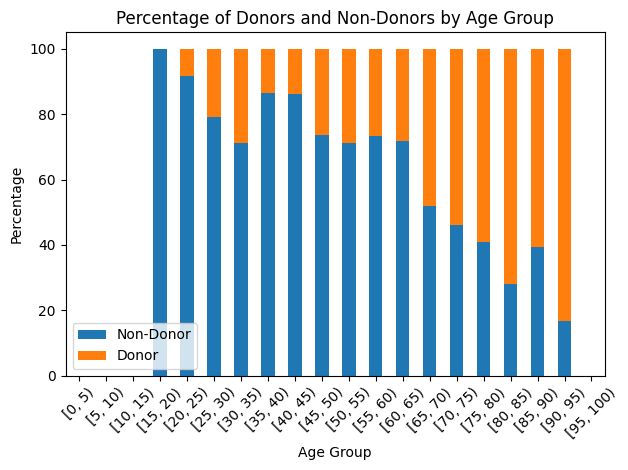

is_donor          0.0        1.0
age_group                       
[0, 5)       0.000000   0.000000
[5, 10)      0.000000   0.000000
[10, 15)     0.000000   0.000000
[15, 20)   100.000000   0.000000
[20, 25)    91.666667   8.333333
[25, 30)    79.166667  20.833333
[30, 35)    71.153846  28.846154
[35, 40)    86.567164  13.432836
[40, 45)    86.000000  14.000000
[45, 50)    73.737374  26.262626
[50, 55)    71.186441  28.813559
[55, 60)    73.214286  26.785714
[60, 65)    71.755725  28.244275
[65, 70)    52.000000  48.000000
[70, 75)    45.959596  54.040404
[75, 80)    41.059603  58.940397
[80, 85)    27.927928  72.072072
[85, 90)    39.393939  60.606061
[90, 95)    16.666667  83.333333
[95, 100)    0.000000   0.000000


In [ ]:
# Calculate the percentage of donors and non-donors
grouped = age_surveys.groupby('age_group')['is_donor'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Fill NaN values with 0 for plotting
grouped = grouped.fillna(0)

# Plotting the results as a stacked bar chart
grouped.plot(kind='bar', stacked=True)
plt.title('Percentage of Donors and Non-Donors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()
plt.show()

# Print the percentages
print(grouped)

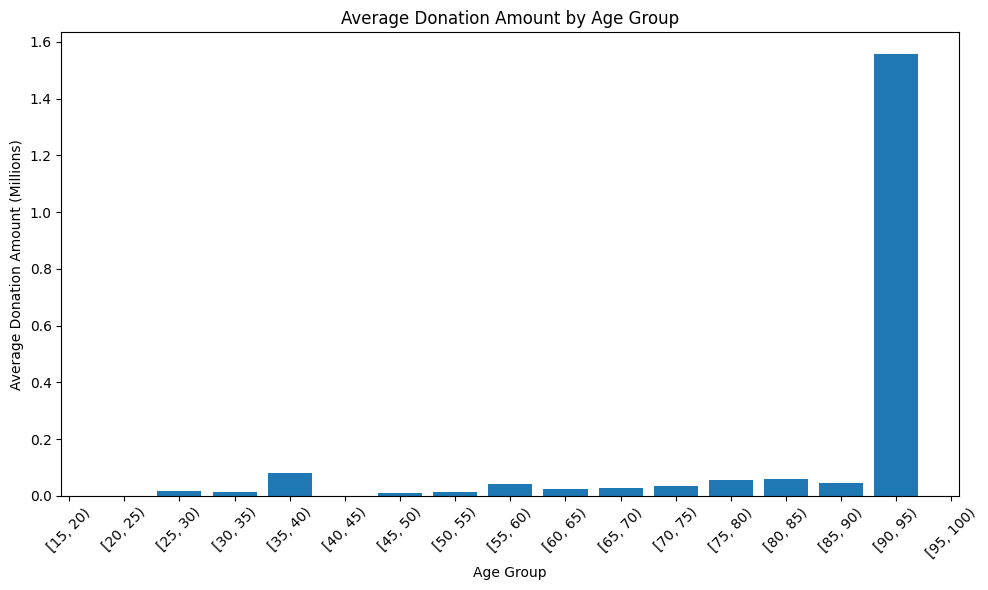

age_group
[0, 5)                NaN
[5, 10)               NaN
[10, 15)              NaN
[15, 20)              NaN
[20, 25)     1.000000e+00
[25, 30)     1.861536e+04
[30, 35)     1.368657e+04
[35, 40)     8.018885e+04
[40, 45)     6.515286e+02
[45, 50)     9.426423e+03
[50, 55)     1.452044e+04
[55, 60)     4.327840e+04
[60, 65)     2.265793e+04
[65, 70)     2.917565e+04
[70, 75)     3.613789e+04
[75, 80)     5.749797e+04
[80, 85)     6.045035e+04
[85, 90)     4.603111e+04
[90, 95)     1.556088e+06
[95, 100)             NaN
Name: cont_amt, dtype: float64


In [ ]:
# Group by age group and calculate the average donation amount
average_donation_by_age = age_surveys.groupby('age_group')['cont_amt'].mean()

# Convert the average donation amount to millions
average_donation_by_age_millions = average_donation_by_age / 1_000_000

# Plot the average donation amount (in millions) in each age group
plt.figure(figsize=(10, 6))
plt.bar(average_donation_by_age_millions.index.astype(str), average_donation_by_age_millions)
plt.xlabel('Age Group')
plt.ylabel('Average Donation Amount (Millions)')
plt.title('Average Donation Amount by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the average donation amount in each age group
print(average_donation_by_age)

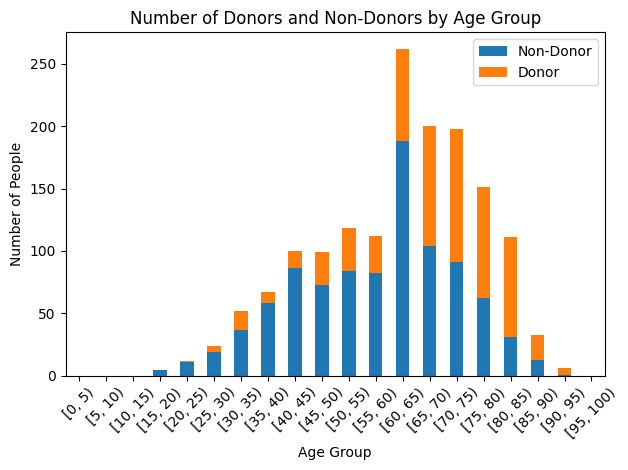

is_donor   0.0  1.0
age_group          
[0, 5)       0    0
[5, 10)      0    0
[10, 15)     0    0
[15, 20)     5    0
[20, 25)    11    1
[25, 30)    19    5
[30, 35)    37   15
[35, 40)    58    9
[40, 45)    86   14
[45, 50)    73   26
[50, 55)    84   34
[55, 60)    82   30
[60, 65)   188   74
[65, 70)   104   96
[70, 75)    91  107
[75, 80)    62   89
[80, 85)    31   80
[85, 90)    13   20
[90, 95)     1    5
[95, 100)    0    0


In [ ]:
# Calculate the number of donors and non-donors in each age group
age_group_counts = age_surveys.groupby(['age_group', 'is_donor'])['customer_no'].count().unstack(fill_value=0)

# Plotting the results as a stacked bar chart
age_group_counts.plot(kind='bar', stacked=True)
plt.title('Number of Donors and Non-Donors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()
plt.show()

# Print the number of donors and non-donors in each age group
print(age_group_counts)

# Household Income (HHI) Feature


In [ ]:
hhi1 = surveys1[['customer_no', 'annual_income']] # Only keep the columns relevant to HHI
hhi1 = hhi1.dropna(subset=['annual_income']) # Drop NA values
hhi1 = hhi1[~hhi1['annual_income'].str.contains("Prefer not to answer", na=False)] # Drop "Prefer not to answer"

hhi2 = surveys2[['customer_no', 'annual_income']] # Only keep the columns relevant to HHI
hhi2 = hhi2.dropna(subset=['annual_income']) # Dro NA values
hhi2 = hhi2[~hhi2['annual_income'].str.contains("Prefer not to answer", na=False)] # Drop "Prefer not to answer"

In [ ]:
# Merge the two surveys together
hhi = pd.concat([hhi1, hhi2], ignore_index=True)
hhi = hhi.sort_values('customer_no')
# Merge the rows together by customer_no so that each unique customer_no is its own row
# Group by 'customer_no' and aggregate 'annual_income' by:
# - Getting unique values
# - Excluding NaN and 'nan' strings
# - Joining them into a comma-separated string
hhi = hhi.groupby('customer_no', as_index=False).agg({
    'annual_income': lambda x: ','.join(
        [str(val) for val in x.unique() if pd.notna(val) and str(val) != 'nan']
    )
})


# Merge the entire survey file with the customer's summed donation amounts file
hhi_surveys = pd.concat([donations, hhi], ignore_index=True)
hhi_surveys = hhi_surveys.sort_values('customer_no')
# Grouping again by customer_no and aggregating unique values as a comma-separated string by:
# - Getting unique values
# - Excluding NaN and 'nan' strings
# - Joining them into a comma-separated string
hhi_surveys = hhi_surveys.groupby('customer_no', as_index=False).agg(lambda x: ','.join(
    [str(val) for val in x.unique() if pd.notna(val) and str(val) != 'nan']
))

# By default, set all value responses in a new column called "is_donor" to be 0.0
hhi_surveys['cont_amt'] = pd.to_numeric(hhi_surveys['cont_amt'], errors='coerce')
hhi_surveys['is_donor'] = 0.0
hhi_surveys.loc[hhi_surveys['cont_amt'].notna(), 'is_donor'] = 1.0  # If the customer made a contribution (cont_amt has a value), then set is_donor to be 1.0
hhi_surveys = hhi_surveys[hhi_surveys['annual_income'] != ''] # Remove rows where annual_income is an empty string


In [ ]:
# Define income priority mapping, with the highest rank being the highest income
income_priority = {
    "$1,000,000+": 7,
    "$500,000 +": 6,
    "$500,000-$999,999": 6,
    "$250,000-$499,999": 5,
    "$200,000-$249,999": 4,
    "$150,000-$199,999": 3,
    "$125,000-$149,999": 2,
    "$100,000-$124,999": 1,
    "$75,000-$99,999": 0,
    "$50,000-$74,999": -1,
    "$35,000-$49,999": -2,
    "$25,000-$34,999": -3,
    "$15,000-$24,999": -4,
    "Under $15,000": -5,
}

# Create a function that deals with customers who responded with various income brackets across different surveys
def get_highest_income_bracket(income_str):
    # Extract income brackets and convert to a list
    brackets = re.findall(r'\$[0-9,]+(?:-\$[0-9,]+)?|\$[0-9,]+ \+|Under \$[0-9,]+', income_str)

    # Select bracket with the highest priority
    if brackets:
        highest_bracket = max(brackets, key=lambda bracket: income_priority.get(bracket, -float('inf')))
    else:
        highest_bracket = None

    return highest_bracket

# Apply the function to create a new column
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['annual_income'].apply(get_highest_income_bracket)

In [ ]:
# Fix inconsistent responses that mean the same income bracket

# Replace "$250,000-$499,999," with just "$250,000-$499,999"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$250,000-$499,999,', '$250,000-$499,999')

# Replace "$500,000" with "$500,000-$999,999"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$500,000', '$500,000-$999,999')

# Replace "$15,000" with "Under $15,000"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$15,000', 'Under $15,000')

# Replace "$1,000,000" with "$1,000,000+"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$1,000,000', '$1,000,000 +')

# Replace "$35,000-$49,000," with "$35,000-$49,000"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$35,000-$49,000,', '$35,000-$49,000')

# Replace "$125,000-$149,000," with "$125,000-$149,000"
hhi_surveys.loc[:, 'highest_income_bracket'] = hhi_surveys['highest_income_bracket'].replace('$125,000-$149,000,', '$125,000-$149,000')


In [ ]:
print(f"Sample size: {len(hhi_surveys)}")

Sample size: 1155


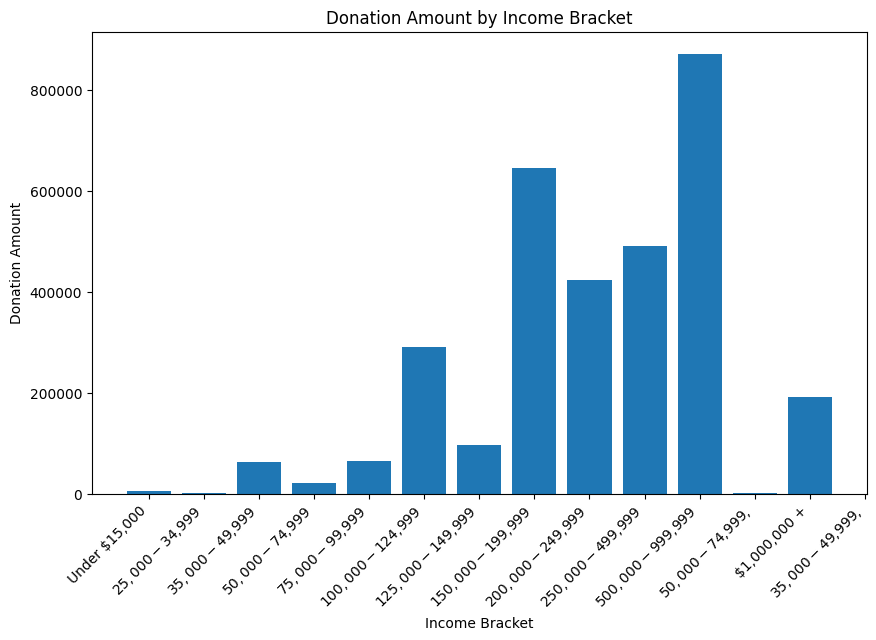

highest_income_bracket
$1,000,000 +           191636.72
$100,000-$124,999      537046.40
$125,000-$149,999      459746.45
$125,000-$149,999,          0.00
$150,000-$199,999     1550634.59
$200,000-$249,999      920053.99
$25,000-$34,999          2790.80
$250,000-$499,999     3319396.97
$35,000-$49,999         84593.32
$35,000-$49,999,            0.00
$50,000-$74,999         52666.30
$50,000-$74,999,          534.00
$500,000-$999,999     5434307.35
$75,000-$99,999        187218.05
Under $15,000            5370.40
Name: cont_amt, dtype: float64


In [ ]:
# Create a new column 'income_priority' based on the mapping
hhi_surveys.loc[:, 'income_priority'] = hhi_surveys['highest_income_bracket'].map(income_priority)

# Sort the DataFrame based on 'income_priority'
hhi_surveys_sorted = hhi_surveys.sort_values('income_priority')

# Example plot (replace with your actual plot code)
plt.figure(figsize=(10, 6))
plt.bar(hhi_surveys_sorted['highest_income_bracket'], hhi_surveys_sorted['cont_amt'])
plt.xlabel('Income Bracket')
plt.ylabel('Donation Amount')
plt.title('Donation Amount by Income Bracket')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Print the donation amounts for each income bracket
donation_by_bracket = hhi_surveys.groupby('highest_income_bracket')['cont_amt'].sum()
print(donation_by_bracket)

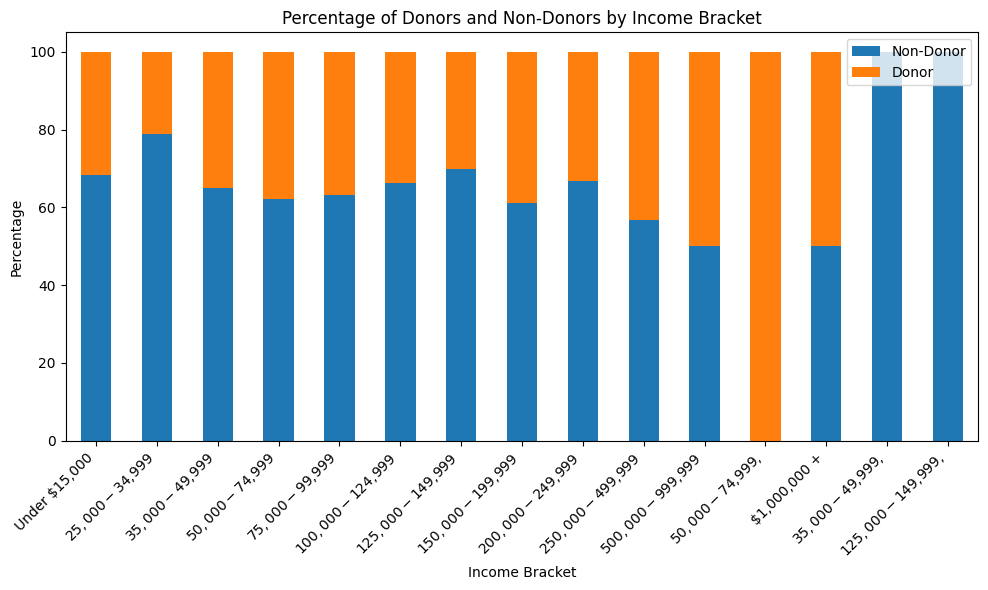

is_donor                       0.0         1.0
highest_income_bracket                        
Under $15,000            68.421053   31.578947
$25,000-$34,999          78.947368   21.052632
$35,000-$49,999          64.864865   35.135135
$50,000-$74,999          62.162162   37.837838
$75,000-$99,999          63.114754   36.885246
$100,000-$124,999        66.197183   33.802817
$125,000-$149,999        69.811321   30.188679
$150,000-$199,999        61.068702   38.931298
$200,000-$249,999        66.666667   33.333333
$250,000-$499,999        56.880734   43.119266
$500,000-$999,999        50.000000   50.000000
$50,000-$74,999,          0.000000  100.000000
$1,000,000 +             50.000000   50.000000
$35,000-$49,999,        100.000000    0.000000
$125,000-$149,999,      100.000000    0.000000


In [ ]:
# Group by 'highest_income_bracket' and 'is_donor'
grouped_income = hhi_surveys.groupby(['highest_income_bracket', 'is_donor']).size().unstack(fill_value=0)

# Calculate the percentage for each income bracket
percentage_income = grouped_income.div(grouped_income.sum(axis=1), axis=0) * 100

# Sort the DataFrame based on the 'income_priority'
percentage_income = percentage_income.loc[hhi_surveys.sort_values('income_priority')['highest_income_bracket'].unique()]

# Plotting the results as a stacked bar chart for income brackets
percentage_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Donors and Non-Donors by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()
print(percentage_income)

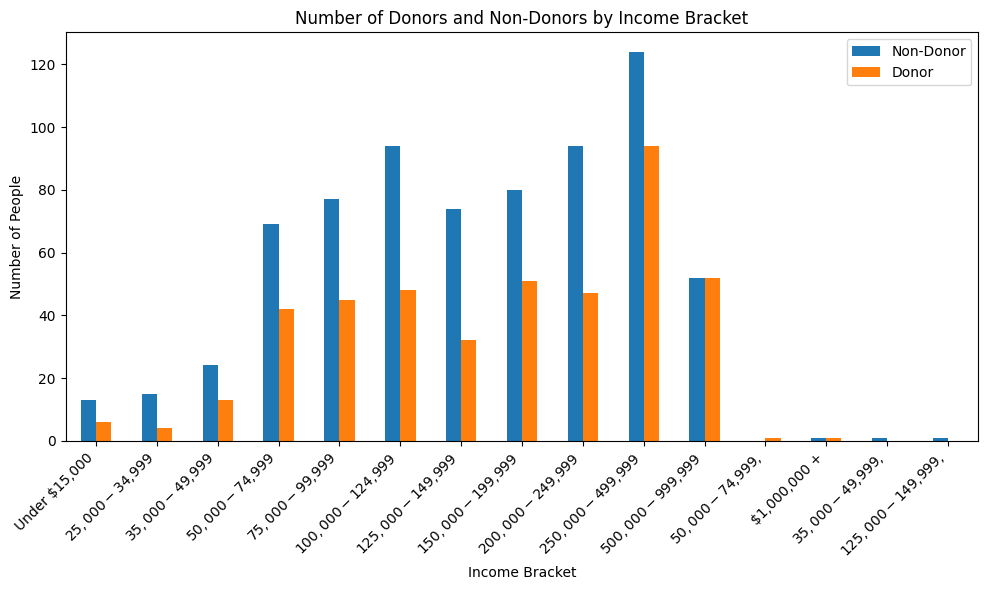

is_donor                0.0  1.0
highest_income_bracket          
Under $15,000            13    6
$25,000-$34,999          15    4
$35,000-$49,999          24   13
$50,000-$74,999          69   42
$75,000-$99,999          77   45
$100,000-$124,999        94   48
$125,000-$149,999        74   32
$150,000-$199,999        80   51
$200,000-$249,999        94   47
$250,000-$499,999       124   94
$500,000-$999,999        52   52
$50,000-$74,999,          0    1
$1,000,000 +              1    1
$35,000-$49,999,          1    0
$125,000-$149,999,        1    0


In [ ]:
# Sort the grouped data based on 'income_priority'
freq_income = grouped_income.loc[hhi_surveys.sort_values('income_priority')['highest_income_bracket'].unique()]

# Plotting the results as a bar chart for income brackets
ax = freq_income.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Donors and Non-Donors by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()
print(freq_income)

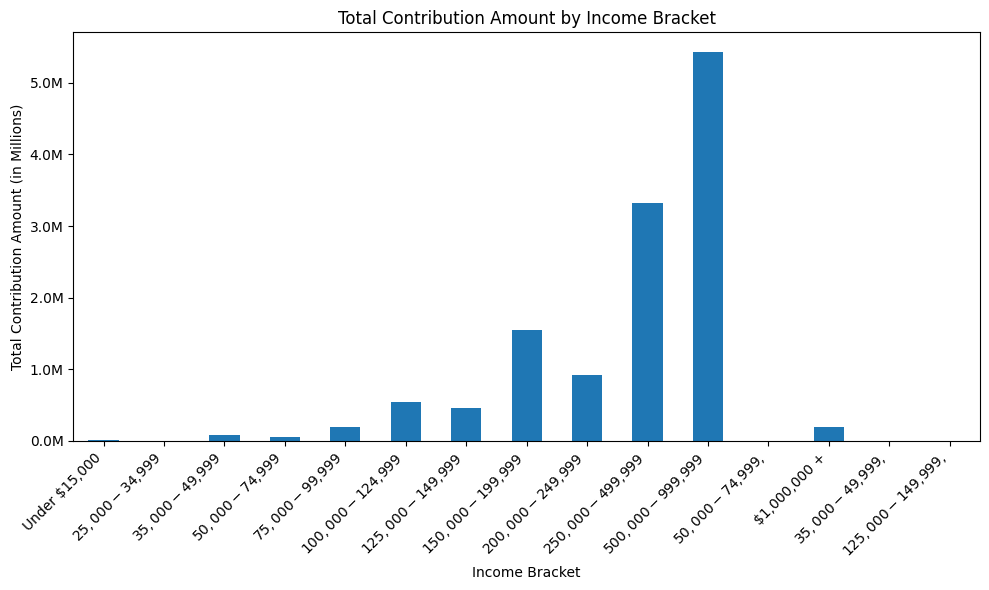

highest_income_bracket
Under $15,000            5370.40
$25,000-$34,999          2790.80
$35,000-$49,999         84593.32
$50,000-$74,999         52666.30
$75,000-$99,999        187218.05
$100,000-$124,999      537046.40
$125,000-$149,999      459746.45
$150,000-$199,999     1550634.59
$200,000-$249,999      920053.99
$250,000-$499,999     3319396.97
$500,000-$999,999     5434307.35
$50,000-$74,999,          534.00
$1,000,000 +           191636.72
$35,000-$49,999,            0.00
$125,000-$149,999,          0.00
Name: cont_amt, dtype: float64


In [ ]:
# Add income_priority column to the DataFrame based on the 'highest_income_bracket'
hhi_surveys['income_priority'] = hhi_surveys['highest_income_bracket'].map(income_priority)


# Group by 'highest_income_bracket' and sum the contribution amounts
income_donations = hhi_surveys.groupby('highest_income_bracket')['cont_amt'].sum()


# Sort the income brackets by income priority
income_donations = income_donations.loc[hhi_surveys.sort_values('income_priority')['highest_income_bracket'].unique()]


# Create a bar chart for total contribution amount by income bracket
ax = income_donations.plot(kind='bar', figsize=(10, 6))


# Format y-axis in millions
ax.set_yticklabels(['{:.1f}M'.format(y / 1000000) for y in ax.get_yticks()])


plt.title('Total Contribution Amount by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Total Contribution Amount (in Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()


# Show the plot
plt.show()
print(income_donations)

# Education


In [ ]:
ed1 = surveys1[['customer_no', 'education_level']]  # Only keep the columns relevant to education
ed1 = ed1.dropna(subset=['education_level']) # Drop NA values
ed1 = ed1[~ed1['education_level'].str.contains("Prefer not to answer", na=False)] # Drop "Prefer not to answer"

ed2 = surveys2[['customer_no', 'education_level']]  # Only keep the columns relevant to education
ed2 = ed2.dropna(subset=['education_level']) # Drop NA values
ed2 = ed2[~ed2['education_level'].str.contains("Prefer not to answer", na=False)] # Drop "Prefer not to answer"

In [ ]:
# Concatenate the two surveys and reset the index
ed = pd.concat([ed1, ed2], ignore_index=True)

# Sort the dataframe by 'customer_no'
ed = ed.sort_values('customer_no')

# Group by 'customer_no' and aggregate 'education_level' by:
# - Getting unique values
# - Excluding NaN and 'nan' strings
# - Joining them into a comma-separated string
ed = ed.groupby('customer_no', as_index=False).agg({
    'education_level': lambda x: ','.join(
        [str(val) for val in x.unique() if pd.notna(val) and str(val) != 'nan']
    )
})

In [ ]:
# Concatenate the entire survey file with the summed contributions and reset the index
ed_surveys = pd.concat([donations, ed], ignore_index=True)

# Sort by 'customer_no'
ed_surveys = ed_surveys.sort_values('customer_no')
# Grouping again by customer_no and aggregating unique values as a comma-separated string
ed_surveys = ed_surveys.groupby('customer_no', as_index=False).agg(lambda x: ','.join(
    [str(val) for val in x.unique() if pd.notna(val) and str(val) != 'nan']
))

In [ ]:
# Convert 'cont_amt' column to numeric, forcing errors to NaN
ed_surveys['cont_amt'] = pd.to_numeric(ed_surveys['cont_amt'])

# Initialize 'is_donor' column to 0.0 (not a donor)
ed_surveys['is_donor'] = 0.0

# Set 'is_donor' to 1.0 for rows where 'cont_amt' is not NaN (indicating a donation)
ed_surveys.loc[ed_surveys['cont_amt'].notna(), 'is_donor'] = 1.0

# Filter out rows where 'education_level' is empty
ed_surveys = ed_surveys[ed_surveys['education_level'] != '']

# Drop the rows without any response in education_level
ed_surveys = ed_surveys.dropna(subset=['education_level'])
ed_surveys = ed_surveys[ed_surveys['education_level'] != '']

# Replace double quotes with single quotes in the 'ed_col' column
ed_surveys['education_level'] = ed_surveys['education_level'].str.replace('"', "'", regex=False)

In [ ]:
# Fix inconsistent responses in education_level that mean the same degree
ed_surveys['education_level'] = ed_surveys['education_level'].str.replace('"', "'", regex=False)
ed_surveys['education_level'] = ed_surveys['education_level'].str.replace(r"Bachelor__ degree|bachelor__ degree|Bachelorâ__s", "Bachelor's degree", regex=True)
ed_surveys['education_level'] = ed_surveys['education_level'].str.replace(r"Associates degree", "Associate degree", regex=True)
ed_surveys['education_level'] = ed_surveys['education_level'].str.replace(r"Professional degree beyond bachelor’s degree", "Professional degree beyond Bachelor’s degree", regex=True)

In [ ]:
# Define priority mapping for education levels, with the highest rank being the highest degree
education_priority = {
    "Doctorate degree": 1,
    "Master's degree": 2,
    "Professional degree beyond Bachelor’s degree": 3,
    "Bachelor's degree": 4,
    "Associate degree": 5,
    "Some college credit, no degree": 6,
    "High school diploma": 7,
    "Some high school": 8
}

# Create a function that deals with customers who responded with various education levels across different surveys
def get_highest_priority_education(education_string):
    if not education_string:  # Check for None or empty values
        return None

    # Split the string by commas
    educations = education_string.split(',')
    highest_priority = float('inf')
    highest_priority_education = None

    # Iterate through each education level
    for education in educations:
        education = education.strip()  # Normalize by removing leading/trailing spaces
        if education in education_priority:
            if education_priority[education] < highest_priority:
                highest_priority = education_priority[education]
                highest_priority_education = education

    return highest_priority_education

# Apply the function to the education_level column
ed_surveys['education_level'] = ed_surveys['education_level'].apply(get_highest_priority_education)


In [ ]:
# Create a new column that groups ['Some high school' 'Doctorate degree'
#  'Professional degree beyond Bachelor’s degree' "Master's degree" None
#  "Bachelor's degree" 'High school diploma' 'Associate degree'] into three groups:
# High school or lower
# Undergraduate/Bachelors
# Graduate (Master or PhD)

def categorize_education(education_level):
  if education_level in ['Some high school', 'High school diploma']:
    return 'High school or lower'
  elif education_level in ["Bachelor's degree", 'Associate degree', 'Some college credit, no degree']:
    return 'Undergraduate/Bachelors'
  elif education_level in ["Master's degree", 'Doctorate degree', 'Professional degree beyond Bachelor’s degree']:
    return 'Graduate (Master or PhD)'
  else:
    return None

# Apply the function
ed_surveys['education_category'] = ed_surveys['education_level'].apply(categorize_education)

In [ ]:
print(f"Sample size: {len(ed_surveys)}")

Sample size: 1673


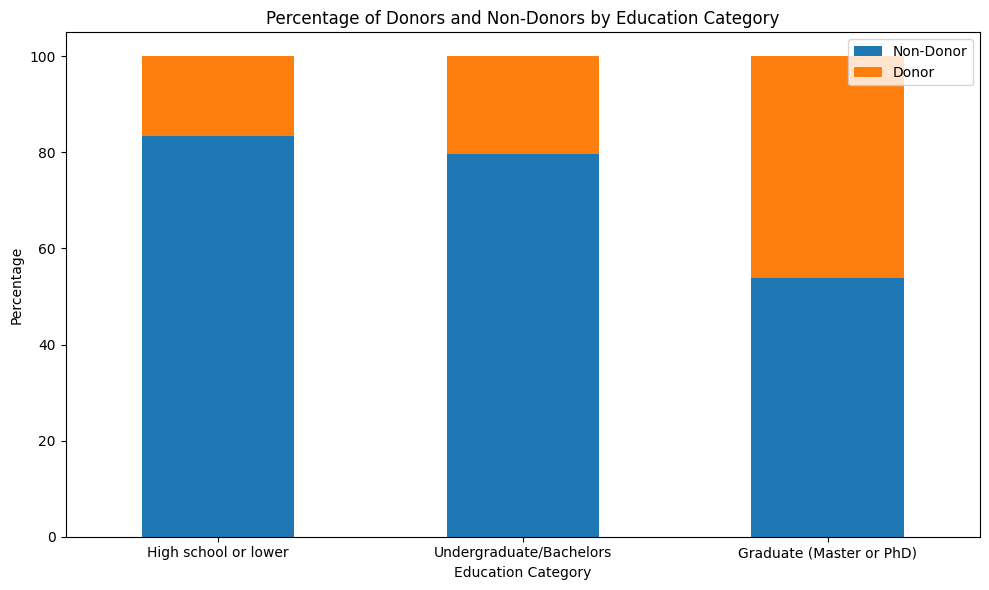

is_donor                        0.0        1.0
education_category                            
High school or lower      83.333333  16.666667
Undergraduate/Bachelors   79.720280  20.279720
Graduate (Master or PhD)  53.796791  46.203209


In [ ]:
# Plot the percentage of donors and non-donors in each education category

# Group by 'education_category' and 'is_donor'
grouped_education = ed_surveys.groupby(['education_category', 'is_donor']).size().unstack(fill_value=0)

# Calculate the percentage for each education category
percentage_education = grouped_education.div(grouped_education.sum(axis=1), axis=0) * 100

# Define the order for the x-axis
category_order = ['High school or lower', 'Undergraduate/Bachelors', 'Graduate (Master or PhD)']

# Sort the DataFrame based on the defined order
percentage_education = percentage_education.loc[category_order]

# Plotting the results as a stacked bar chart for education categories
ax = percentage_education.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Percentage of Donors and Non-Donors by Education Category')
plt.xlabel('Education Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()

print(percentage_education)

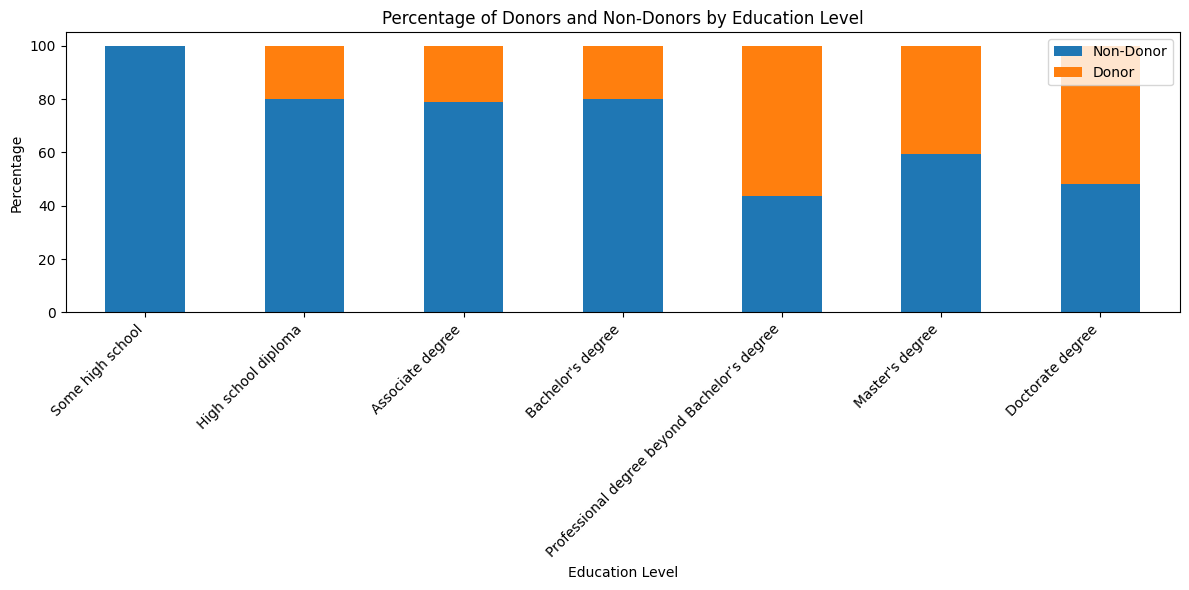

is_donor                                             0.0        1.0
education_level                                                    
Some high school                              100.000000   0.000000
High school diploma                            80.000000  20.000000
Associate degree                               79.069767  20.930233
Bachelor's degree                              79.835391  20.164609
Professional degree beyond Bachelor’s degree   43.511450  56.488550
Master's degree                                59.570312  40.429688
Doctorate degree                               48.287671  51.712329


In [ ]:
# Group by 'education_level' and 'is_donor'
grouped_education_level = ed_surveys.groupby(['education_level', 'is_donor']).size().unstack(fill_value=0)

# Calculate the percentage for each education level
percentage_education_level = grouped_education_level.div(grouped_education_level.sum(axis=1), axis=0) * 100

# Define the order for the x-axis
level_order = ["Some high school", "High school diploma", "Associate degree", "Bachelor's degree", "Professional degree beyond Bachelor’s degree", "Master's degree", "Doctorate degree"]

# Sort the DataFrame based on the defined order
percentage_education_level = percentage_education_level.loc[level_order]

# Plotting the results as a stacked bar chart for education levels
ax = percentage_education_level.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Percentage of Donors and Non-Donors by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()

print(percentage_education_level)

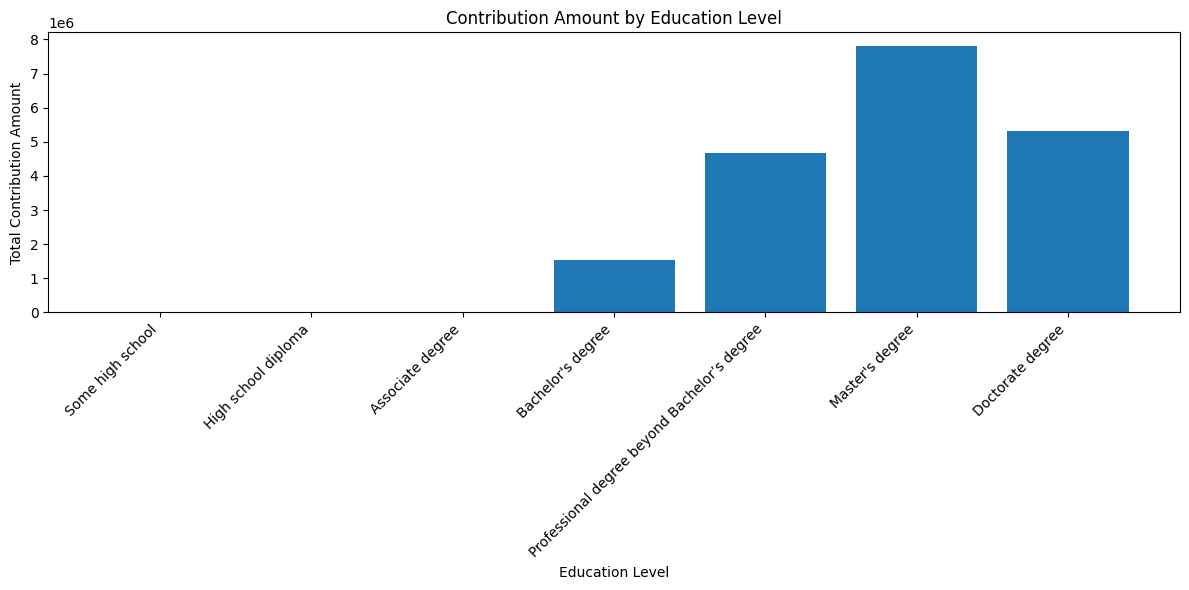

education_level
Some high school                                      0.00
High school diploma                                  22.00
Associate degree                                   2777.50
Bachelor's degree                               1528160.10
Professional degree beyond Bachelor’s degree    4683099.79
Master's degree                                 7817388.63
Doctorate degree                                5309214.42
Name: cont_amt, dtype: float64


In [ ]:
# Group by 'education_level' and sum the contribution amounts
education_donations = ed_surveys.groupby('education_level')['cont_amt'].sum()

# Sort the education levels by the defined order
education_donations = education_donations.loc[level_order]


# Create a bar chart for total contribution amount by education level
plt.figure(figsize=(12, 6))
plt.bar(education_donations.index, education_donations.values)
plt.xlabel('Education Level')
plt.ylabel('Total Contribution Amount')
plt.title('Contribution Amount by Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

print(education_donations)

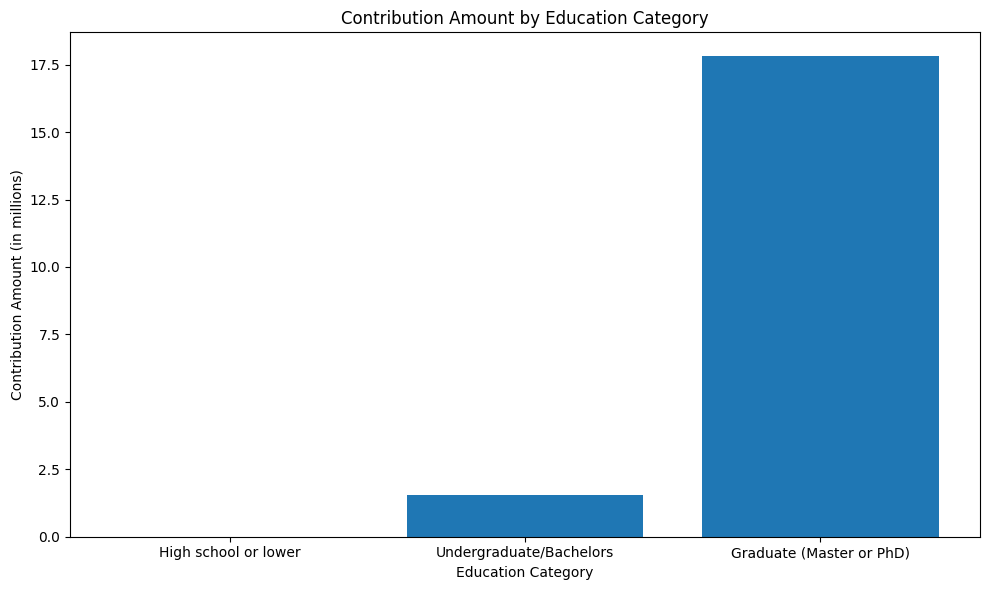

education_category
High school or lower              22.00
Undergraduate/Bachelors      1530937.60
Graduate (Master or PhD)    17809702.84
Name: cont_amt, dtype: float64


In [ ]:
# Group by education category and sum the contribution amounts
contribution_by_education = ed_surveys.groupby('education_category')['cont_amt'].sum()


# Sort the contribution amounts based on the defined order
contribution_by_education = contribution_by_education.loc[category_order]

# Create a bar chart for total contribution amount by education category
plt.figure(figsize=(10, 6))
plt.bar(contribution_by_education.index, contribution_by_education.values / 1000000)  # Divide by 1 million
plt.xlabel('Education Category')
plt.ylabel('Contribution Amount (in millions)')
plt.title('Contribution Amount by Education Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(contribution_by_education)

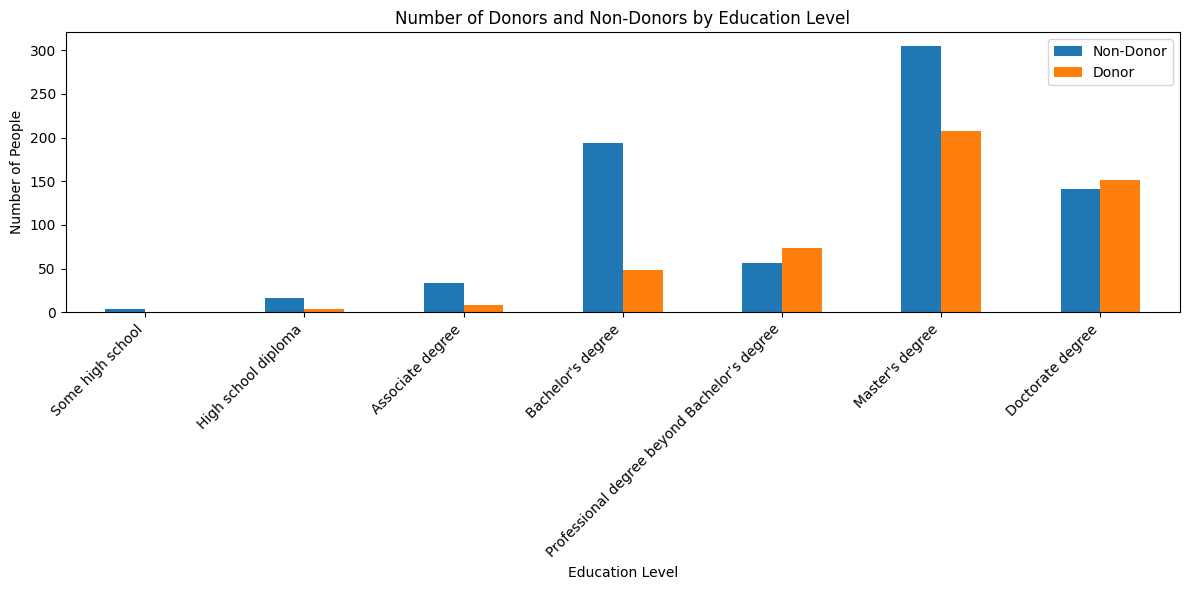

is_donor                                      0.0  1.0
education_level                                       
Some high school                                4    0
High school diploma                            16    4
Associate degree                               34    9
Bachelor's degree                             194   49
Professional degree beyond Bachelor’s degree   57   74
Master's degree                               305  207
Doctorate degree                              141  151


In [ ]:
# prompt: # Plot the number of donors and non-donor in each education level, ordered by level-order in the x axis

# Group by 'education_level' and 'is_donor'
grouped_education_level = ed_surveys.groupby(['education_level', 'is_donor']).size().unstack(fill_value=0)

# Sort the DataFrame based on the defined order
grouped_education_level = grouped_education_level.loc[level_order]

# Plotting the results as a bar chart for education levels
ax = grouped_education_level.plot(kind='bar', figsize=(12, 6))

plt.title('Number of Donors and Non-Donors by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()

print(grouped_education_level)

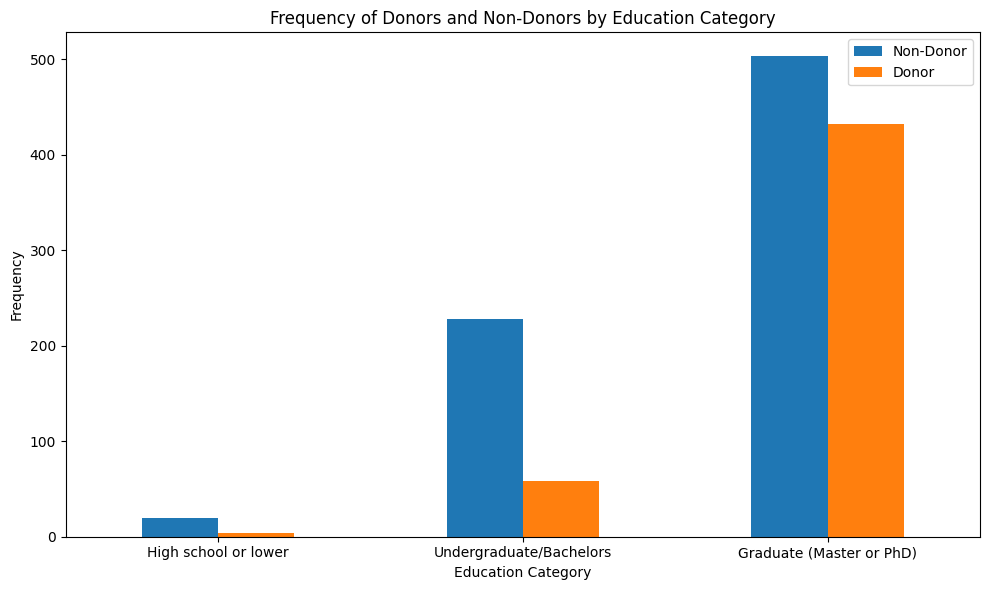

is_donor                  0.0  1.0
education_category                
High school or lower       20    4
Undergraduate/Bachelors   228   58
Graduate (Master or PhD)  503  432


In [ ]:
# Plot the frequency of donors and non-donors in each education category
# Group by 'education_category' and 'is_donor'
grouped_education = ed_surveys.groupby(['education_category', 'is_donor']).size().unstack(fill_value=0)

# Sort the DataFrame based on the defined order
grouped_education = grouped_education.loc[category_order]

# Plotting the results as a bar chart for education categories
ax = grouped_education.plot(kind='bar', figsize=(10, 6))

plt.title('Frequency of Donors and Non-Donors by Education Category')
plt.xlabel('Education Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(['Non-Donor', 'Donor'])
plt.tight_layout()

# Show the plot
plt.show()

print(grouped_education)